In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df['rest_type'].head()

0          Casual Dining
1          Casual Dining
2    Cafe, Casual Dining
3            Quick Bites
4          Casual Dining
Name: rest_type, dtype: object

In [5]:
df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [6]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [10]:
df['approx_cost(for two people)'].describe()

count    22511.000000
mean       706.294256
std        415.004117
min         40.000000
25%        400.000000
50%        600.000000
75%        900.000000
max       2000.000000
Name: approx_cost(for two people), dtype: float64

In [7]:
import streamlit as st
st.write("hello")

2024-04-26 11:55:26.115 
  command:

    streamlit run c:\Users\Khushi\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


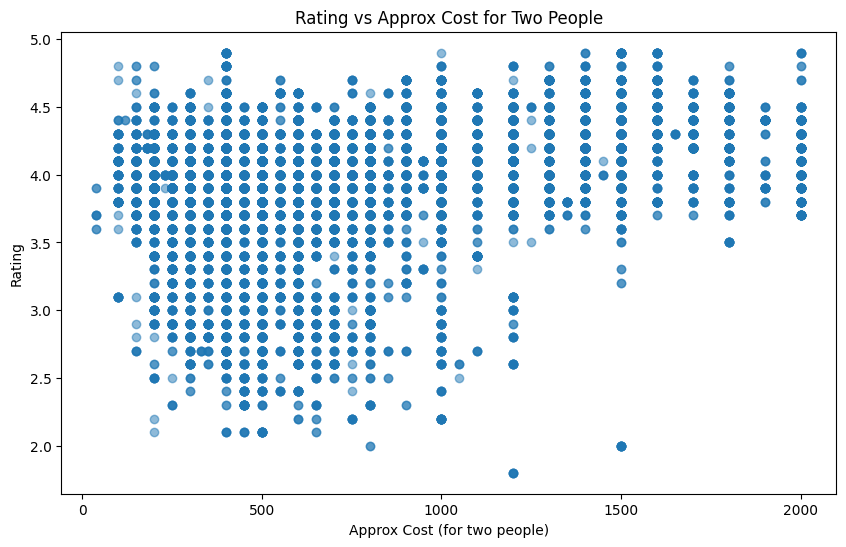

In [13]:
# Drop rows with missing values in 'approx_cost(for two people)' and 'rate' columns
df = df.dropna()

# Filter out rows where 'rate' is "NEW" or "-"
df = df[(df['rate'] != 'NEW') & (df['rate'] != '-')]

# Convert 'approx_cost(for two people)' column to numeric
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '').astype(float)

# Remove rows with 'approx_cost(for two people)' greater than 4000
df = df[df['approx_cost(for two people)'] <= 2000]

# Extract numeric part of 'rate' column before the backslash
df['rate'] = df['rate'].astype(str)
df['rate'] = df['rate'].str.split('/').str[0].astype(float)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['approx_cost(for two people)'], df['rate'], alpha=0.5)
plt.title('Rating vs Approx Cost for Two People')
plt.xlabel('Approx Cost (for two people)')
plt.ylabel('Rating')
# plt.grid(True)

# Set custom x-axis ticks
x_ticks = np.arange(0, 2001, 500)
plt.xticks(x_ticks)

# Show the plot
plt.show()


# k-means

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


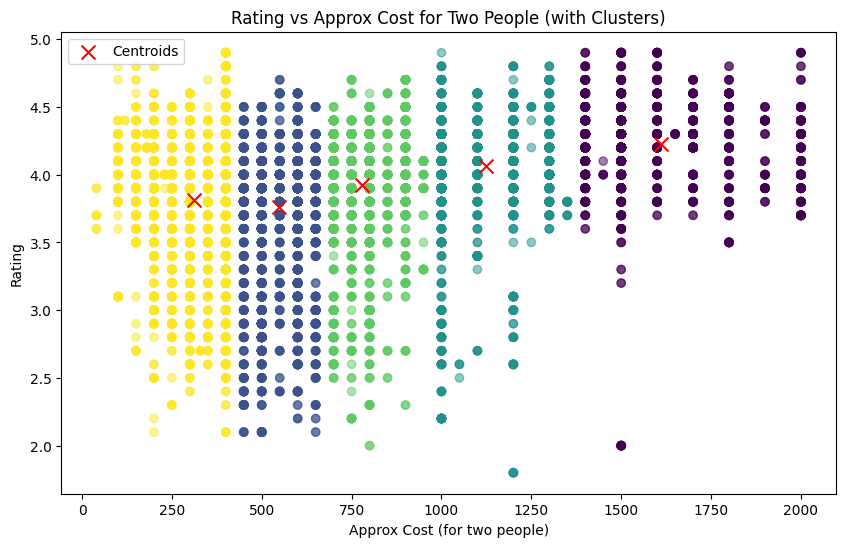

In [14]:
from sklearn.cluster import KMeans

# Perform K-means clustering
X = df[['approx_cost(for two people)', 'rate']].values
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['approx_cost(for two people)'], df['rate'], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title('Rating vs Approx Cost for Two People (with Clusters)')
plt.xlabel('Approx Cost (for two people)')
plt.ylabel('Rating')
# plt.grid(True)
plt.legend()
plt.show()

# dbscan

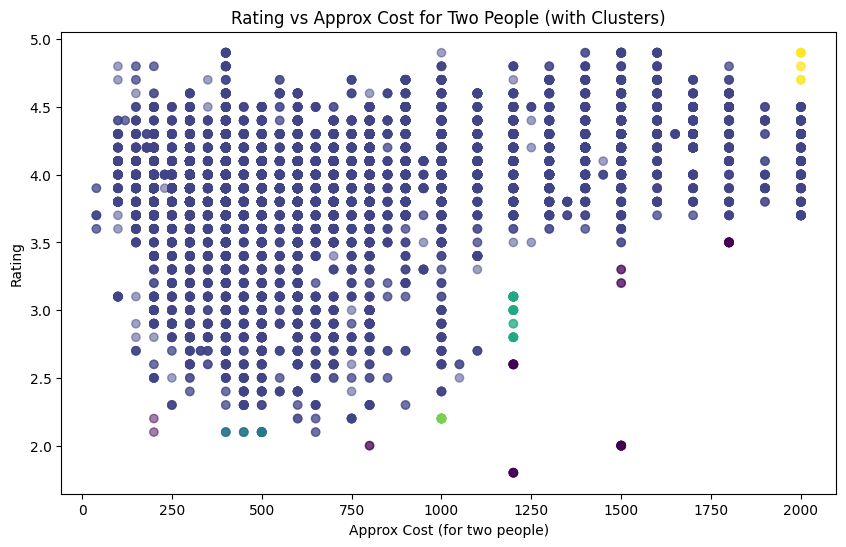

In [15]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Perform DBSCAN clustering
X = df[['approx_cost(for two people)', 'rate']].values
X = StandardScaler().fit_transform(X)  # Standardize features by removing the mean and scaling to unit variance
dbscan = DBSCAN(eps=0.3, min_samples=10)
labels = dbscan.fit_predict(X)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['approx_cost(for two people)'], df['rate'], c=labels, cmap='viridis', alpha=0.5)
plt.title('Rating vs Approx Cost for Two People (with Clusters)')
plt.xlabel('Approx Cost (for two people)')
plt.ylabel('Rating')
# plt.grid(True)
plt.show()

# gaussian mixture model

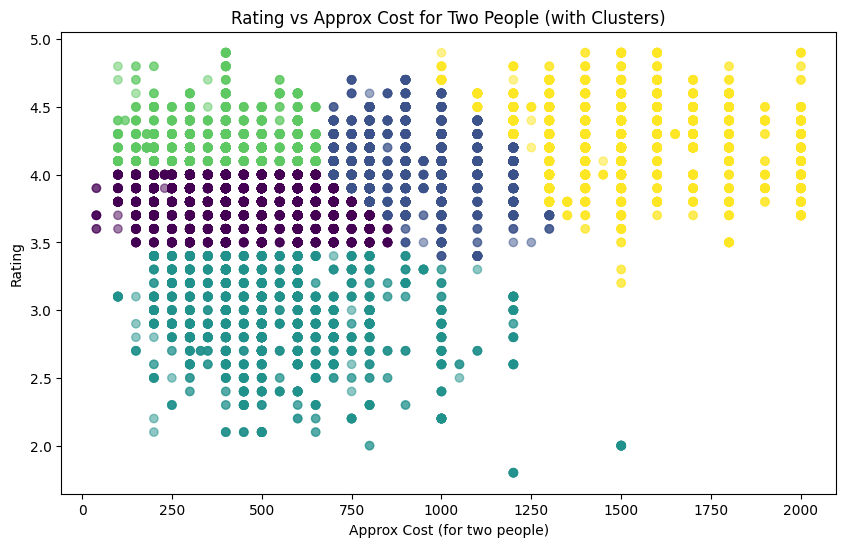

In [16]:
from sklearn.mixture import GaussianMixture

# Perform Gaussian Mixture Model (GMM) clustering
X = df[['approx_cost(for two people)', 'rate']].values
X = StandardScaler().fit_transform(X)  # Standardize features by removing the mean and scaling to unit variance
gmm = GaussianMixture(n_components=5, random_state=42)
labels = gmm.fit_predict(X)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['approx_cost(for two people)'], df['rate'], c=labels, cmap='viridis', alpha=0.5)
plt.title('Rating vs Approx Cost for Two People (with Clusters)')
plt.xlabel('Approx Cost (for two people)')
plt.ylabel('Rating')
# plt.grid(True)
plt.show()

* heirarchial agglomerative clustering 

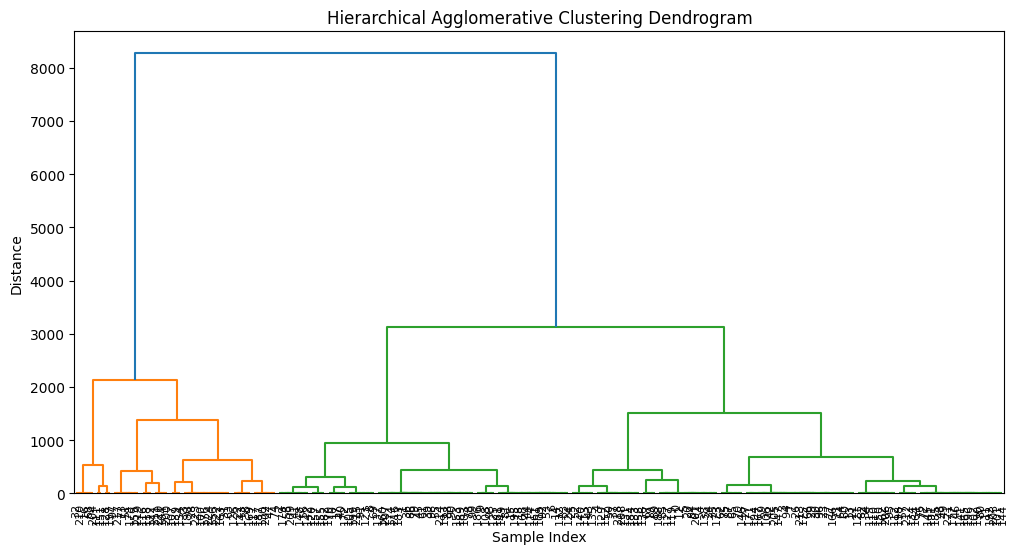

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Sample a fraction of the data (e.g., 1%)
df_sample = df.sample(frac=0.01, random_state=42)  # Adjust the fraction as needed

# Perform clustering on the sampled data
X_sample = df_sample[['approx_cost(for two people)', 'rate']].values.astype(float)
Z_sample = linkage(X_sample, method='ward')

# Plotting dendrogram
plt.figure(figsize=(12, 6))
plt.title('Hierarchical Agglomerative Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z_sample, leaf_rotation=90., leaf_font_size=8.)
plt.show()

# PCA - rate and no of votes

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Convert 'rate' column to numeric
df['rate'] = df['rate'].apply(lambda x: float(x.split('/')[0]) if isinstance(x, str) else x)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['rate', 'votes']])

# Apply PCA
pca = PCA(n_components=1)
principal_components = pca.fit_transform(scaled_data)

# # Add PCA result as a new column to the DataFrame
df['pca_component'] = principal_components
df['pca_component']
# # Display the DataFrame with PCA result
# print(df.head())

0        0.448398
1        0.456029
2        0.042978
3       -0.650270
4       -0.435219
           ...   
51704   -0.089690
51705   -0.459383
51707   -0.326362
51708   -2.092911
51711   -2.640137
Name: pca_component, Length: 22511, dtype: float64

# FP growth

In [22]:
import pyfpgrowth

# Convert the 'rest_type' column to a list of lists
transactions = df['rest_type'].apply(lambda x: x.split(',')).tolist()

# Perform FP-growth algorithm to find frequent itemsets
patterns = pyfpgrowth.find_frequent_patterns(transactions, 250)  # Adjust the support threshold as needed

# Print the frequent itemsets
for itemset, support in patterns.items():
    print(f"Itemset: {itemset}, Support: {support}")

Itemset: ('Food Court',), Support: 252
Itemset: (' Dessert Parlor',), Support: 268
Itemset: ('Lounge',), Support: 309
Itemset: ('Beverage Shop',), Support: 332
Itemset: (' Delivery',), Support: 341
Itemset: (' Delivery', 'Takeaway'), Support: 341
Itemset: ('Takeaway',), Support: 354
Itemset: ('Bakery',), Support: 384
Itemset: (' Quick Bites',), Support: 472
Itemset: (' Cafe',), Support: 597
Itemset: (' Cafe', 'Casual Dining'), Support: 290
Itemset: ('Delivery',), Support: 667
Itemset: ('Pub',), Support: 676
Itemset: ('Bar',), Support: 691
Itemset: (' Casual Dining', 'Bar'), Support: 328
Itemset: (' Casual Dining',), Support: 856
Itemset: (' Bar',), Support: 1028
Itemset: (' Bar', 'Casual Dining'), Support: 938
Itemset: ('Dessert Parlor',), Support: 1361
Itemset: ('Cafe',), Support: 2789
Itemset: ('Quick Bites',), Support: 5422
Itemset: ('Casual Dining',), Support: 8684


In [73]:
import pyfpgrowth

# Convert the 'rest_type' column to a list of lists
transactions = df['dish_liked'].apply(lambda x: x.split(',')).tolist()

# Perform FP-growth algorithm to find frequent itemsets
patterns = pyfpgrowth.find_frequent_patterns(transactions, 250)  # Adjust the support threshold as needed

# Print the frequent itemsets
for itemset, support in patterns.items():
    print(f"Itemset: {itemset}, Support: {support}")

Itemset: (' Ghee Rice',), Support: 256
Itemset: ('Tandoori Chicken',), Support: 256
Itemset: (' Potato Wedges',), Support: 261
Itemset: (' Steak',), Support: 263
Itemset: (' Jalebi',), Support: 263
Itemset: (' Sangria',), Support: 264
Itemset: ('Momos',), Support: 269
Itemset: ('Masala Dosa',), Support: 270
Itemset: (' Idli',), Support: 275
Itemset: ('Lassi',), Support: 276
Itemset: (' Peri Peri Chicken',), Support: 278
Itemset: ('Chaat',), Support: 284
Itemset: (' Neer Dosa',), Support: 286
Itemset: (' Cappuccino',), Support: 287
Itemset: ('Salads',), Support: 292
Itemset: ('Chicken Biryani',), Support: 296
Itemset: (' Chicken Kebab',), Support: 297
Itemset: (' Naan',), Support: 312
Itemset: (' Samosa',), Support: 312
Itemset: (' Mojito',), Support: 313
Itemset: (' Chicken Tikka',), Support: 317
Itemset: (' Hyderabadi Biryani',), Support: 323
Itemset: (' Garlic Bread',), Support: 329
Itemset: (' Shawarma',), Support: 342
Itemset: (' Lunch Buffet',), Support: 344
Itemset: ('Sandwiches'

# PrefixSpan

In [23]:
import pandas as pd
from prefixspan import PrefixSpan

# Read data from CSV file
data = pd.read_csv('zomato.csv')

# Extract the 'dish_liked' column
dish_liked_column = data['dish_liked']

# Clean up values: remove leading/trailing whitespace and split by commas
dish_liked_column = dish_liked_column.str.strip().str.split(',')

# Get unique dishes
unique_dishes = set()
for dishes in dish_liked_column:
    if isinstance(dishes, list):
        unique_dishes.update(dishes)

# Mapping of categories to numerical values
category_to_num = {dish: i+1 for i, dish in enumerate(unique_dishes)}

# Convert categorical data to numerical data
numerical_data = [[category_to_num[dish] for dish in sequence if dish.strip() in category_to_num] if isinstance(sequence, list) else [] for sequence in dish_liked_column]

# Apply PrefixSpan algorithm
ps = PrefixSpan(numerical_data)
patterns = ps.frequent(50)  # Mine frequent sequential patterns with minimum support 2

# Reverse mapping of numerical values to categories
num_to_category = {v: k for k, v in category_to_num.items()}

# Convert numerical patterns back to categorical values and print frequent sequential patterns
for support, numerical_pattern in patterns:
    categorical_pattern = [num_to_category[num] for num in numerical_pattern]
    print("Support:", support, "Pattern:", categorical_pattern)



Support: 672 Pattern: ['Pasta']
Support: 58 Pattern: ['Pasta', ' Garlic Bread']
Support: 112 Pattern: ['Pasta', ' Nachos']
Support: 132 Pattern: ['Pasta', ' Mocktails']
Support: 230 Pattern: ['Pasta', ' Pizza']
Support: 57 Pattern: ['Pasta', ' Pizza', ' Nachos']
Support: 52 Pattern: ['Pasta', ' Pizza', ' Mocktails']
Support: 124 Pattern: ['Pasta', ' Burgers']
Support: 103 Pattern: ['Pasta', ' Sandwiches']
Support: 64 Pattern: ['Pasta', ' Fries']
Support: 145 Pattern: ['Pasta', ' Salads']
Support: 82 Pattern: ['Pasta', ' Salad']
Support: 63 Pattern: ['Pasta', ' Sandwich']
Support: 53 Pattern: ['Pasta', ' Tiramisu']
Support: 51 Pattern: ['Pasta', ' Wine']
Support: 56 Pattern: ['Pasta', ' Coffee']
Support: 367 Pattern: [' Lunch Buffet']
Support: 57 Pattern: [' Lunch Buffet', ' Noodles']
Support: 65 Pattern: [' Lunch Buffet', ' Fish']
Support: 127 Pattern: [' Masala Papad']
Support: 134 Pattern: [' Dum Biryani']
Support: 275 Pattern: ['Momos']
Support: 108 Pattern: ['Momos', ' Noodles']
Su

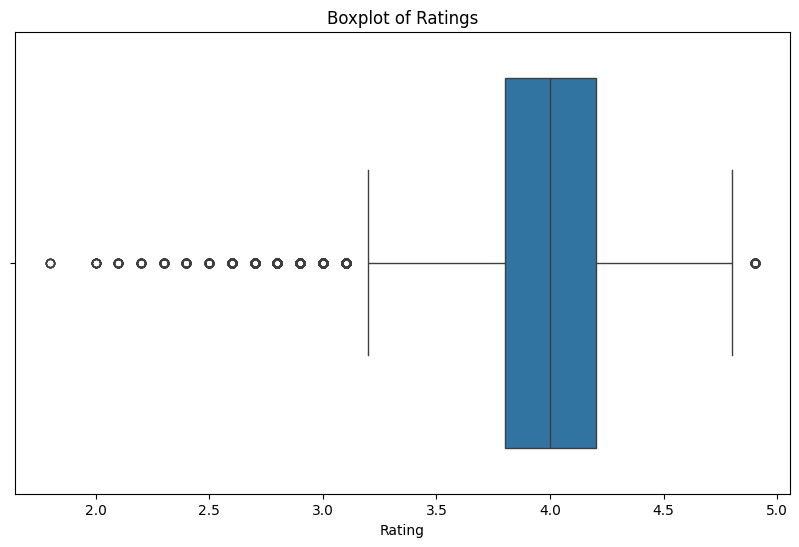

In [24]:
import matplotlib.pyplot as plt
import numpy as np
 
import seaborn as sns

# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['rate'], data=df)
plt.title('Boxplot of Ratings')
plt.xlabel('Rating')
plt.show()


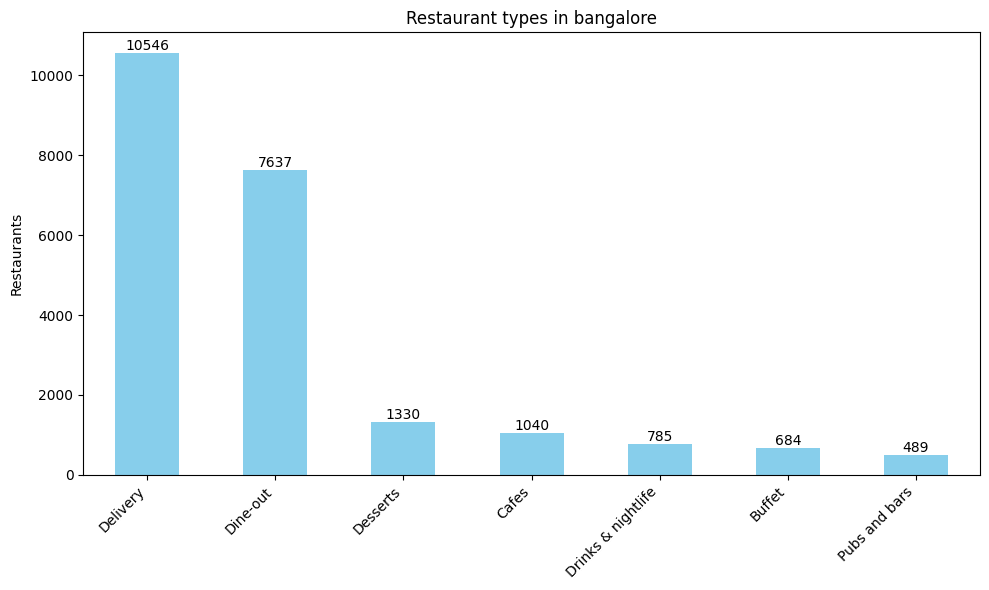

In [25]:
import matplotlib.pyplot as plt

# Get the counts of each unique value
value_counts = df['listed_in(type)'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Restaurant types in bangalore')
# plt.xlabel('Unique Values')
plt.ylabel('Restaurants')

# Add value labels on top of each bar
for i, count in enumerate(value_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


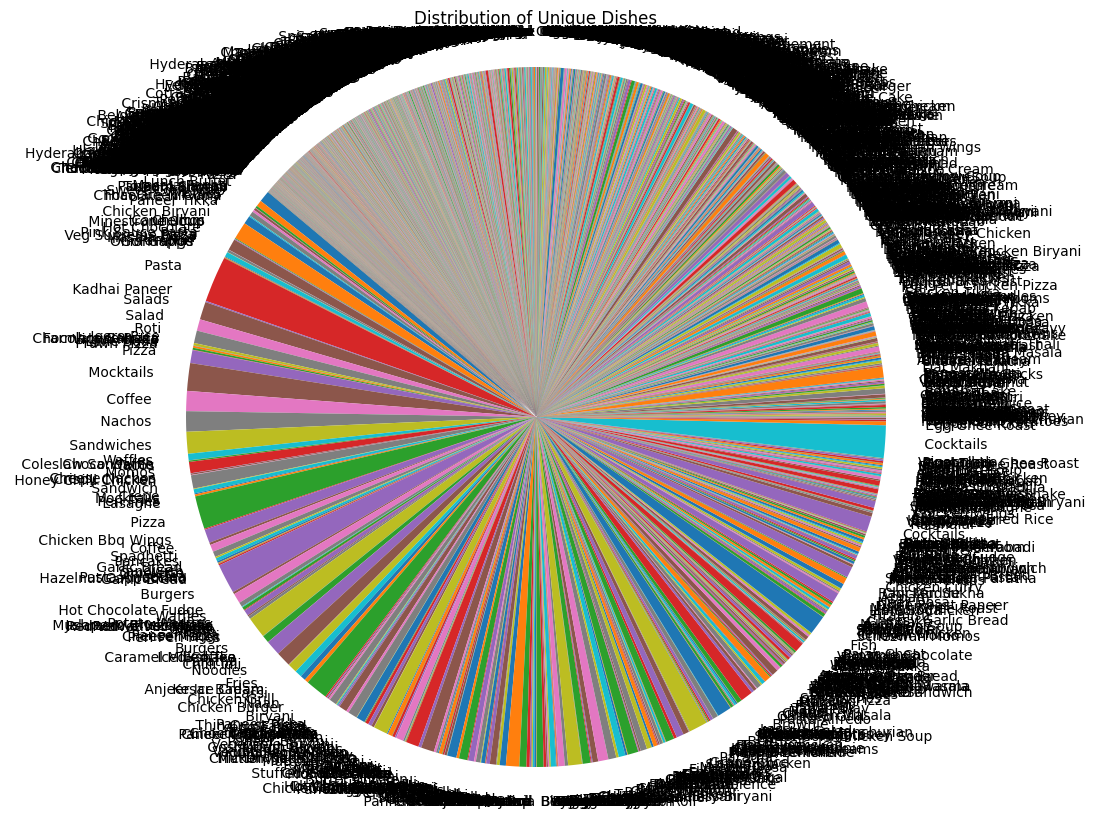

In [26]:
dish_liked_column = data['dish_liked']

# Clean up values: remove leading/trailing whitespace and split by commas
dish_liked_column = dish_liked_column.str.strip().str.split(',')

# Get unique dishes
unique_dishes = set()
for dishes in dish_liked_column:
    if isinstance(dishes, list):
        unique_dishes.update(dishes)
        
dish_counts = {}
for dishes in dish_liked_column:
    if isinstance(dishes, list):
        for dish in dishes:
            dish_counts[dish] = dish_counts.get(dish, 0) + 1

# Create a pie chart
plt.figure(figsize=(12, 10))
plt.pie(dish_counts.values(), labels=dish_counts.keys(), startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Unique Dishes')
plt.show()        
        

In [28]:
df_temp = df.sample(frac=0.001, random_state=42)  # random_state for reproducibility

# Save the sampled data to a new CSV file
df_temp.to_csv('zomato_sample.csv', index=False)